In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram, linkage

In [14]:
data = pd.read_csv("/content/Iris.csv")

features = data.iloc[:, 1:5]
features

target = data['Species']
target

scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [25]:
features.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [19]:
num_unique_species = data['Species'].nunique()
num_unique_species

3

K-Means

In [57]:
kmeans = KMeans(n_clusters=3, init="random")
kmeans_labels = kmeans.fit_predict(features)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [58]:
from sklearn.metrics import adjusted_rand_score

kmeans_ari = adjusted_rand_score(target, kmeans_labels)
print("Adjusted Rand Index (ARI) for K-means: " + str(kmeans_ari))

Adjusted Rand Index (ARI) for K-means: 0.7302382722834697


Hierarchical

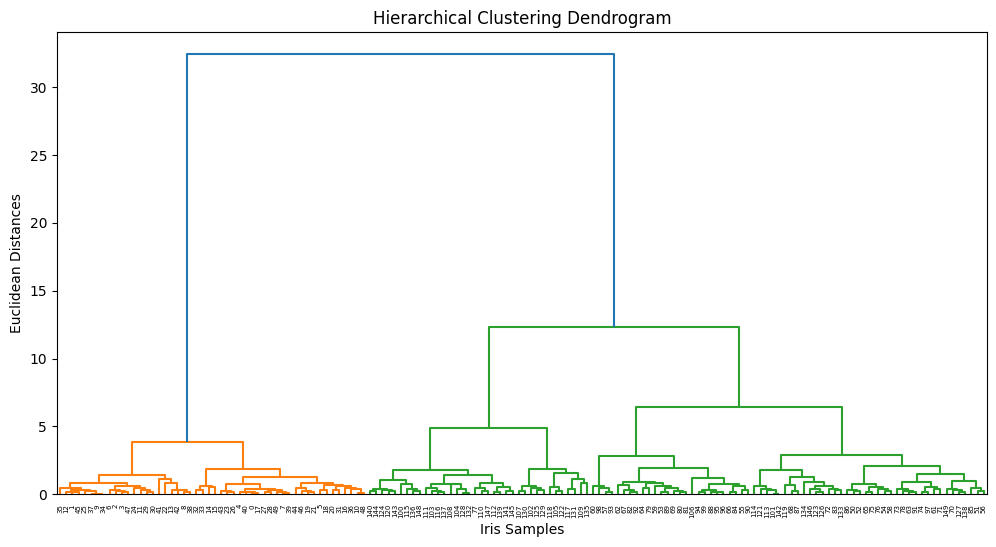

In [59]:
linkage_matrix = linkage(features, method='ward')
plt.figure(figsize=(12, 6))
dendrogram(linkage_matrix)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Iris Samples')
plt.ylabel('Euclidean Distances')
plt.show()

In [60]:
agg_clustering = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
agg_clusters = agg_clustering.fit_predict(features)

data['Cluster_Hierarchical'] = agg_clusters

cols_needed = data.select_dtypes(exclude='object').columns[:9]
data.groupby('Cluster_Hierarchical')[cols_needed].mean().T

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


Cluster_Hierarchical,0,1,2
Id,87.562500,25.500,123.500000
SepalLengthCm,5.920312,5.006,6.869444
SepalWidthCm,2.751562,3.418,3.086111
PetalLengthCm,4.420312,1.464,5.769444
PetalWidthCm,1.434375,0.244,2.105556
Cluster_KMeans,1.937500,1.000,0.000000
Cluster_Hierarchical,0.000000,1.000,2.000000


github:
## **https://github.com/tabibyte**